# Multivariate relationships

In [1]:
import pandas as pd
import numpy as np
from scipy.stats import linregress
import statsmodels.formula.api as smf


import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

# For reading stock data from yahoo
import yfinance as yf
yf.pdr_override()

In [2]:
start = '2020-01-01'
end = '2020-12-31'

symbol = 'AMD'

In [3]:
df = yf.download(symbol, start, end)

[*********************100%***********************]  1 of 1 completed


In [4]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,46.860001,49.250000,46.630001,49.099998,49.099998,80331100
2020-01-03,48.029999,49.389999,47.540001,48.599998,48.599998,73127400
2020-01-06,48.020000,48.860001,47.860001,48.389999,48.389999,47934900
2020-01-07,49.349998,49.389999,48.040001,48.250000,48.250000,58061400
2020-01-08,47.849998,48.299999,47.139999,47.830002,47.830002,53767000


In [5]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-12-23,93.080002,93.129997,91.459999,91.550003,91.550003,25993300
2020-12-24,91.800003,92.510002,91.309998,91.809998,91.809998,16705900
2020-12-28,92.930000,93.139999,90.820000,91.599998,91.599998,30627300
2020-12-29,91.660004,92.459999,89.430000,90.620003,90.620003,31748200
2020-12-30,90.779999,92.849998,90.190002,92.290001,92.290001,25845000


In [6]:
df1 = df.copy()
df2 = df.copy()

In [7]:
# Run regression with linregress
data = df1.dropna(subset=['Close', 'Open'])
xs = data['Open']
ys = data['Close']
res = linregress(xs, ys)
print(res)

# Run regression with StatsModels
results = smf.ols('Close ~ Open', data = df).fit()
print(results.params)

LinregressResult(slope=0.9913260730102901, intercept=0.5903513716228872, rvalue=0.9941976773743896, pvalue=4.2296336523703754e-244, stderr=0.006783577950096053)
Intercept    0.590351
Open         0.991326
dtype: float64


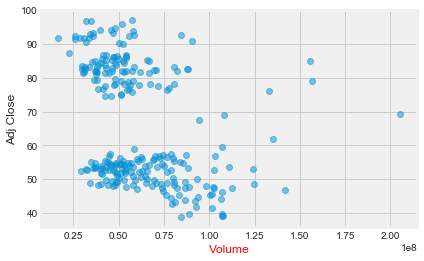

In [8]:
# Group by Volume
grouped = df.groupby('Volume')

# Compute mean Adj Close in each group
mean_adj_close = grouped['Adj Close'].mean()

# Plot mean income as a scatter plot
plt.plot(mean_adj_close, 'o', alpha = 0.5)

# Label the axes
plt.xlabel('Volume', color='r')
plt.ylabel('Adj Close')
plt.show()

In [9]:
# Add a new column with educ squared
df['Close2'] = df['Close'] ** 2

# Run a regression model with educ, educ2, age, and age2
results = smf.ols('Open ~ Close + Close2 + High + Low', data = df).fit()

# Print the estimated parameters
print(results.params)

Intercept   -0.382706
Close       -0.615110
Close2      -0.000062
High         0.803877
Low          0.823298
dtype: float64


In [10]:
df2.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,46.860001,49.250000,46.630001,49.099998,49.099998,80331100
2020-01-03,48.029999,49.389999,47.540001,48.599998,48.599998,73127400
2020-01-06,48.020000,48.860001,47.860001,48.389999,48.389999,47934900
2020-01-07,49.349998,49.389999,48.040001,48.250000,48.250000,58061400
2020-01-08,47.849998,48.299999,47.139999,47.830002,47.830002,53767000


In [11]:
reg = smf.ols('Volume ~ Close + Close2 + High + Low', data = df).fit()

# Make the DataFrame
ndata = pd.DataFrame()
ndata['Close'] = np.linspace(0, 20)
ndata['High'] = df2['High'].max()
ndata['Close2'] = df2['Close']**2
ndata['Low'] = df2['Low']**2

# Generate and plot the predictions
pred = reg.predict(ndata)
print(pred.head())

0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
dtype: float64


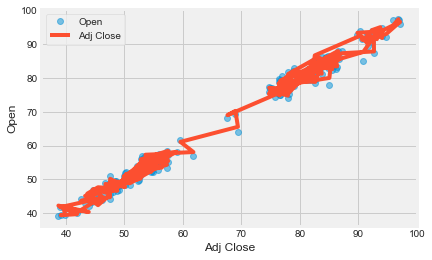

In [12]:
# Plot mean Volume in each age group
plt.clf()
grouped = df.groupby('Adj Close')
mean_open = grouped['Open'].mean()
plt.plot(mean_open, 'o', alpha = 0.5)

# Plot the predictions
pred = results.predict(df)
plt.plot(df['Adj Close'], pred, label='Adj Close')

# Label axes
plt.xlabel('Adj Close')
plt.ylabel('Open')
plt.legend()
plt.show()